In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [2]:
tf.__version__

'2.16.1'

In [3]:
!pip install tensorflow==2.16.1


[notice] A new release of pip is available: 23.2.1 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
!pip install scikit-learn==1.5.0

^C


In [ ]:
import sklearn
sklearn.__version__

'1.5.0'

In [5]:
data = pd.read_csv("datamitra.csv")
data.head()

,Nama Mitra,Link Instagram,Nama Trip,Gunung,Jalur via,Nama Paket,Harga Paket,Min kuota,max kuota,Transportasi PP,...,Dokumentasi,Private/Tidak,Logistik,Coffe Break/Buah,BBM,Tiket,Jeep,Asuransi,Tanggal Berangkat,Tanggal Pulang
0,Jaguar Adventure Indonesia,https://www.instagram.com/jaguaradventureindon...,Jaguar Adventure Indonesia - Gunung Gede via P...,Gede,Putri,A,600000,5,15,True,...,True,False,True,True,False,True,False,False,7/6/2024,9/6/2024
1,Jaguar Adventure Indonesia,https://www.instagram.com/jaguaradventureindon...,Jaguar Adventure Indonesia - Gunung Gede via P...,Gede,Putri,A,600000,5,15,True,...,True,False,True,True,False,True,False,False,14/6/2024,16/6/2024
2,Jaguar Adventure Indonesia,https://www.instagram.com/jaguaradventureindon...,Jaguar Adventure Indonesia - Gunung Gede via P...,Gede,Putri,A,600000,5,15,True,...,True,False,True,True,False,True,False,False,21/6/2024,23/6/2024
3,Jaguar Adventure Indonesia,https://www.instagram.com/jaguaradventureindon...,Jaguar Adventure Indonesia - Gunung Gede via P...,Gede,Putri,A,600000,5,15,True,...,True,False,True,True,False,True,False,False,28/6/2024,30/6/2024
4,Jaguar Adventure Indonesia,https://www.instagram.com/jaguaradventureindon...,Jaguar Adventure Indonesia - Gunung Gede via P...,Gede,Putri,A,600000,5,15,True,...,True,False,True,True,False,True,False,False,5/7/2024,7/7/2024


In [6]:
data = data.rename(columns={
                'Private/Tidak': 'Private',
                'Harga Paket': 'price',
                'Min kuota':'min_people',
                'max kuota':'max_people',
                'Nama Trip':'name',
                'Tanggal Berangkat':'start_date',
                'Tanggal Pulang':'end_date',
                'Gunung':'mountain_name'
            })

In [7]:
data

,Nama Mitra,Link Instagram,Nama Trip,mountain_name,Jalur via,Nama Paket,price,min_people,max_people,Transportasi PP,...,Dokumentasi,Private,Logistik,Coffe Break/Buah,BBM,Tiket,Jeep,Asuransi,start_date,end_date
0,Jaguar Adventure Indonesia,https://www.instagram.com/jaguaradventureindon...,Jaguar Adventure Indonesia - Gunung Gede via P...,Gede,Putri,A,600000,5,15,True,...,True,False,True,True,False,True,False,False,7/6/2024,9/6/2024
1,Jaguar Adventure Indonesia,https://www.instagram.com/jaguaradventureindon...,Jaguar Adventure Indonesia - Gunung Gede via P...,Gede,Putri,A,600000,5,15,True,...,True,False,True,True,False,True,False,False,14/6/2024,16/6/2024
2,Jaguar Adventure Indonesia,https://www.instagram.com/jaguaradventureindon...,Jaguar Adventure Indonesia - Gunung Gede via P...,Gede,Putri,A,600000,5,15,True,...,True,False,True,True,False,True,False,False,21/6/2024,23/6/2024
3,Jaguar Adventure Indonesia,https://www.instagram.com/jaguaradventureindon...,Jaguar Adventure Indonesia - Gunung Gede via P...,Gede,Putri,A,600000,5,15,True,...,True,False,True,True,False,True,False,False,28/6/2024,30/6/2024
4,Jaguar Adventure Indonesia,https://www.instagram.com/jaguaradventureindon...,Jaguar Adventure Indonesia - Gunung Gede via P...,Gede,Putri,A,600000,5,15,True,...,True,False,True,True,False,True,False,False,5/7/2024,7/7/2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9252,Hobi Muncak,https://www.instagram.com/hobimuncak_/,Hobi Muncak - Gunung Sindoro via Kledung (Pak...,Sindoro,Kledung,A,475000,15,30,True,...,False,True,False,True,True,False,True,True,20/12/2024,22/12/2024
9253,Hobi Muncak,https://www.instagram.com/hobimuncak_/,Hobi Muncak - Gunung Sindoro via Kledung (Pak...,Sindoro,Kledung,A,475000,15,30,True,...,False,True,False,True,True,False,True,True,23/12/2024,25/12/2024
9254,Hobi Muncak,https://www.instagram.com/hobimuncak_/,Hobi Muncak - Gunung Sindoro via Kledung (Pak...,Sindoro,Kledung,A,475000,15,30,True,...,False,True,False,True,True,False,True,True,24/12/2024,26/12/2024
9255,Hobi Muncak,https://www.instagram.com/hobimuncak_/,Hobi Muncak - Gunung Sindoro via Kledung (Pak...,Sindoro,Kledung,A,475000,15,30,True,...,False,True,False,True,True,False,True,True,25/12/2024,27/12/2024


In [8]:
import requests

In [9]:
response = requests.get("https://highking.cloud/api/open-trips/get-open-trip/rec").json()

  Obtaining dependency information for scikit-learn==1.5.0 from https://files.pythonhosted.org/packages/57/ed/f607ebf69f87bcce2e3fa329bd78da8cafd3d51190a19d58012d2d7f2252/scikit_learn-1.5.0-cp312-cp312-win_amd64.whl.metadata
   ---------------------------------------- 0.0/10.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.9 MB ? eta -:--:--
   --

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\user\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\~klearn\\.libs\\msvcp140.dll'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip is available: 23.2.1 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
response_df = pd.DataFrame(response["data"])

In [ ]:
response_df

,open_trip_uuid,name,image_url,price,min_people,max_people,include,start_date,end_date,mountain_name,mountain_uuid,total_participants
0,02e9e4b4-dfd4-4bd7-986f-3b802cebb860,Trip Central,https://storage.googleapis.com/ents-h104-produ...,640000,8,12,"Tenda, Galon, Kopi Sachet, Mobil",2024-07-17,2024-07-19,Semeru,4c39b644-caf0-4dfa-b114-91a9d9527183,0
1,09be2796-6475-4612-8b04-ea96a9ca21fa,Trip Global,https://storage.googleapis.com/ents-h104-produ...,2500000,4,12,"Tenda, Galon, Kopi Sachet, Mobil",2024-07-07,2024-07-08,Slamet,0a998adb-83e2-4292-b257-2bc8cd6aa21a,0
2,106c00b9-78eb-4f06-9ba9-bd2b1c8d5a94,Trip Human,https://storage.googleapis.com/ents-h104-produ...,2500000,4,12,"Tenda, Galon, Kopi Sachet, Mobil",2024-07-06,2024-07-10,Semeru,4c39b644-caf0-4dfa-b114-91a9d9527183,0
3,22119e5f-a74d-4b44-b306-8e91d7029564,Trip Investor,https://storage.googleapis.com/ents-h104-produ...,2500000,4,12,"Tenda, Galon, Kopi Sachet, Mobil",2024-07-07,2024-07-10,Semeru,4c39b644-caf0-4dfa-b114-91a9d9527183,0
4,25e651ff-f689-47c8-aab0-0605a543e019,Trip Central,https://storage.googleapis.com/ents-h104-produ...,2500000,4,12,"Tenda, Galon, Kopi Sachet, Mobil",2024-07-06,2024-07-10,Semeru,4c39b644-caf0-4dfa-b114-91a9d9527183,0
5,2dc24497-86bd-4bdf-aa9e-ad6e90f4e5f3,Trip Forward,https://storage.googleapis.com/ents-h104-produ...,2500000,4,12,"Tenda, Galon, Kopi Sachet, Mobil",2024-07-06,2024-07-10,Semeru,4c39b644-caf0-4dfa-b114-91a9d9527183,0
6,318e50a6-8bb8-4379-a1c8-93ec6efed564,Trip Dynamic,https://storage.googleapis.com/ents-h104-produ...,250000,4,8,"Tenda, Galon, Kopi Sachet, Mobil",2024-07-12,2024-07-14,Slamet,0a998adb-83e2-4292-b257-2bc8cd6aa21a,1
7,35254180-c511-408f-99df-ca5fb80a25a7,fasd,https://storage.googleapis.com/ents-h104-produ...,1200,1,20,"["""",""Simaksi,Guide,Air mineral,kebakaran,yahh""]",2024-06-16,2024-06-18,Slamet,0a998adb-83e2-4292-b257-2bc8cd6aa21a,0
8,3ea8608e-07b2-409a-97db-df969afd1e67,dfds,https://storage.googleapis.com/ents-h104-produ...,1200,2,10,"["""",""Transportasi PP,Guide,kebakaran,yahh""]",2024-06-16,2024-06-16,Slamet,0a998adb-83e2-4292-b257-2bc8cd6aa21a,0
9,4002f81c-2393-4062-b045-7a645b1d99f8,Trip Forward,https://storage.googleapis.com/ents-h104-produ...,2550000,2,4,"Tenda, Galon, Kopi Sachet, Mobil",2024-07-07,2024-07-09,Bromo,7a0edf01-e5c2-40cf-8cd6-12bb9681fa9a,0


In [ ]:
response_df['start_date'] = pd.to_datetime(response_df['start_date'])

In [ ]:
response_df['end_date'] = pd.to_datetime(response_df['end_date'])
response_df['include'] = response_df['include'].str.lower()

In [ ]:
response_df['include']

0                      tenda, galon, kopi sachet, mobil
1                      tenda, galon, kopi sachet, mobil
2                      tenda, galon, kopi sachet, mobil
3                      tenda, galon, kopi sachet, mobil
4                      tenda, galon, kopi sachet, mobil
5                      tenda, galon, kopi sachet, mobil
6                      tenda, galon, kopi sachet, mobil
7       ["","simaksi,guide,air mineral,kebakaran,yahh"]
8           ["","transportasi pp,guide,kebakaran,yahh"]
9                      tenda, galon, kopi sachet, mobil
10                     tenda, galon, kopi sachet, mobil
11                     tenda, galon, kopi sachet, mobil
12                     tenda, galon, kopi sachet, mobil
13        ["","transportasi pp,rumah singgah/homestay"]
14                     tenda, galon, kopi sachet, mobil
15                     tenda, galon, kopi sachet, mobil
16                     tenda, galon, kopi sachet, mobil
17                     tenda, galon, kopi sachet

In [ ]:
# Assuming 'data' is your DataFrame
data['start_date'] = pd.to_datetime(data['start_date'], format='%d %B %Y')
data['end_date'] = pd.to_datetime(data['end_date'], format='%d %B %Y')

# Extracting numerical features from date columns
data['Berangkat_Year'] = data['start_date'].dt.year
data['Berangkat_Month'] = data['start_date'].dt.month
data['Berangkat_Day'] = data['start_date'].dt.day
data['Pulang_Year'] = data['end_date'].dt.year
data['Pulang_Month'] = data['end_date'].dt.month
data['Pulang_Day'] = data['end_date'].dt.day

# Defining numeric features after extracting date parts
numeric_features = ['price', 'min_people', 'max_people',
                    'Berangkat_Year', 'Berangkat_Month', 'Berangkat_Day',
                    'Pulang_Year', 'Pulang_Month', 'Pulang_Day']
numeric_transformer = StandardScaler()

boolean_features = [
    'Transportasi PP','Simaksi','Guide', 'Rumah singgah/Homestay', 'Makan (sesudah atau Sebelum pendakian)',
    'Makan (selama pendakian)', 'Air mineral', 'P3K standard', 'Alat Masak',
    'Tenda Toilet', 'Porter Team', 'Tenda', 'alat makan', 'Dokumentasi',
    'Private', 'Logistik', 'Coffe Break/Buah', 'BBM', 'Tiket', 'Jeep', 'Asuransi'
]
boolean_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('bool', boolean_transformer, boolean_features)
    ])

# Drop the target column 'Nama Trip' and original date columns
X = data.drop(columns=['name', 'start_date', 'end_date'])
X_processed = preprocessor.fit_transform(X)

# Create TF-IDF matrix for 'Gunung' column
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(data['mountain_name'])

# Concatenate all features
features = np.hstack([X_processed, tfidf_matrix.toarray()])

print('Shape:', features.shape)


Shape: (9257, 69)


In [ ]:
len(boolean_features)

21

In [ ]:
response = requests.get("https://highking.cloud/api/open-trips/get-open-trip/rec").json()
response_df = pd.DataFrame(response["data"])

response_df['start_date'] = pd.to_datetime(response_df['start_date'])
response_df['end_date'] = pd.to_datetime(response_df['end_date'])
response_df['include'] = response_df['include'].str.lower()

# Extracting numerical features from date columns
response_df['Berangkat_Year'] = response_df['start_date'].dt.year
response_df['Berangkat_Month'] = response_df['start_date'].dt.month
response_df['Berangkat_Day'] = response_df['start_date'].dt.day
response_df['Pulang_Year'] = response_df['end_date'].dt.year
response_df['Pulang_Month'] = response_df['end_date'].dt.month
response_df['Pulang_Day'] = response_df['end_date'].dt.day

In [ ]:
response_df

,open_trip_uuid,name,image_url,price,min_people,max_people,include,start_date,end_date,mountain_name,mountain_uuid,total_participants,Berangkat_Year,Berangkat_Month,Berangkat_Day,Pulang_Year,Pulang_Month,Pulang_Day
0,02e9e4b4-dfd4-4bd7-986f-3b802cebb860,Trip Central,https://storage.googleapis.com/ents-h104-produ...,640000,8,12,"tenda, galon, kopi sachet, mobil",2024-07-17,2024-07-19,Semeru,4c39b644-caf0-4dfa-b114-91a9d9527183,0,2024,7,17,2024,7,19
1,09be2796-6475-4612-8b04-ea96a9ca21fa,Trip Global,https://storage.googleapis.com/ents-h104-produ...,2500000,4,12,"tenda, galon, kopi sachet, mobil",2024-07-07,2024-07-08,Slamet,0a998adb-83e2-4292-b257-2bc8cd6aa21a,0,2024,7,7,2024,7,8
2,106c00b9-78eb-4f06-9ba9-bd2b1c8d5a94,Trip Human,https://storage.googleapis.com/ents-h104-produ...,2500000,4,12,"tenda, galon, kopi sachet, mobil",2024-07-06,2024-07-10,Semeru,4c39b644-caf0-4dfa-b114-91a9d9527183,0,2024,7,6,2024,7,10
3,22119e5f-a74d-4b44-b306-8e91d7029564,Trip Investor,https://storage.googleapis.com/ents-h104-produ...,2500000,4,12,"tenda, galon, kopi sachet, mobil",2024-07-07,2024-07-10,Semeru,4c39b644-caf0-4dfa-b114-91a9d9527183,0,2024,7,7,2024,7,10
4,25e651ff-f689-47c8-aab0-0605a543e019,Trip Central,https://storage.googleapis.com/ents-h104-produ...,2500000,4,12,"tenda, galon, kopi sachet, mobil",2024-07-06,2024-07-10,Semeru,4c39b644-caf0-4dfa-b114-91a9d9527183,0,2024,7,6,2024,7,10
5,2dc24497-86bd-4bdf-aa9e-ad6e90f4e5f3,Trip Forward,https://storage.googleapis.com/ents-h104-produ...,2500000,4,12,"tenda, galon, kopi sachet, mobil",2024-07-06,2024-07-10,Semeru,4c39b644-caf0-4dfa-b114-91a9d9527183,0,2024,7,6,2024,7,10
6,318e50a6-8bb8-4379-a1c8-93ec6efed564,Trip Dynamic,https://storage.googleapis.com/ents-h104-produ...,250000,4,8,"tenda, galon, kopi sachet, mobil",2024-07-12,2024-07-14,Slamet,0a998adb-83e2-4292-b257-2bc8cd6aa21a,1,2024,7,12,2024,7,14
7,35254180-c511-408f-99df-ca5fb80a25a7,fasd,https://storage.googleapis.com/ents-h104-produ...,1200,1,20,"["""",""simaksi,guide,air mineral,kebakaran,yahh""]",2024-06-16,2024-06-18,Slamet,0a998adb-83e2-4292-b257-2bc8cd6aa21a,0,2024,6,16,2024,6,18
8,3ea8608e-07b2-409a-97db-df969afd1e67,dfds,https://storage.googleapis.com/ents-h104-produ...,1200,2,10,"["""",""transportasi pp,guide,kebakaran,yahh""]",2024-06-16,2024-06-16,Slamet,0a998adb-83e2-4292-b257-2bc8cd6aa21a,0,2024,6,16,2024,6,16
9,4002f81c-2393-4062-b045-7a645b1d99f8,Trip Forward,https://storage.googleapis.com/ents-h104-produ...,2550000,2,4,"tenda, galon, kopi sachet, mobil",2024-07-07,2024-07-09,Bromo,7a0edf01-e5c2-40cf-8cd6-12bb9681fa9a,0,2024,7,7,2024,7,9


In [ ]:
boolean_features = [
    'Transportasi PP','Simaksi','Guide', 'Rumah singgah/Homestay', 'Makan (sesudah atau Sebelum pendakian)',
    'Makan (selama pendakian)', 'Air mineral', 'P3K standard', 'Alat Masak',
    'Tenda Toilet', 'Porter Team', 'Tenda', 'alat makan', 'Dokumentasi',
    'Private', 'Logistik', 'Coffe Break/Buah', 'BBM', 'Tiket', 'Jeep', 'Asuransi'
]
# Iterate over each feature and create new columns
for feature in boolean_features:
    # Convert the feature name to lowercase for comparison
    feature_lower = feature.lower()

    # Create a new column with 1 if the feature is present, 0 otherwise
    response_df[feature] = response_df['include'].str.contains(feature_lower).astype(int)

<ipython-input-151-011accaf1825>:13: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  response_df[feature] = response_df['include'].str.contains(feature_lower).astype(int)
<ipython-input-151-011accaf1825>:13: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  response_df[feature] = response_df['include'].str.contains(feature_lower).astype(int)


In [ ]:
response_df.columns

Index(['open_trip_uuid', 'name', 'image_url', 'price', 'min_people',
       'max_people', 'include', 'start_date', 'end_date', 'mountain_name',
       'mountain_uuid', 'total_participants', 'Transportasi PP', 'Simaksi',
       'Guide', 'Rumah singgah/Homestay',
       'Makan (sesudah atau Sebelum pendakian)', 'Makan (selama pendakian)',
       'Air mineral', 'P3K standard', 'Alat Masak', 'Tenda Toilet',
       'Porter Team', 'Tenda', 'alat makan', 'Dokumentasi', 'Private',
       'Logistik', 'Coffe Break/Buah', 'BBM', 'Tiket', 'Jeep', 'Asuransi'],
      dtype='object')

In [ ]:
# Extracting numerical features from date columns
response_df['Berangkat_Year'] = response_df['start_date'].dt.year
response_df['Berangkat_Month'] = response_df['start_date'].dt.month
response_df['Berangkat_Day'] = response_df['start_date'].dt.day
response_df['Pulang_Year'] = response_df['end_date'].dt.year
response_df['Pulang_Month'] = response_df['end_date'].dt.month
response_df['Pulang_Day'] = response_df['end_date'].dt.day

# Defining numeric features after extracting date parts
numeric_features = ['price', 'min_people', 'max_people',
                    'Berangkat_Year', 'Berangkat_Month', 'Berangkat_Day',
                    'Pulang_Year', 'Pulang_Month', 'Pulang_Day']
numeric_transformer = StandardScaler()

boolean_features = [
    'Transportasi PP','Simaksi','Guide', 'Rumah singgah/Homestay', 'Makan (sesudah atau Sebelum pendakian)',
    'Makan (selama pendakian)', 'Air mineral', 'P3K standard', 'Alat Masak',
    'Tenda Toilet', 'Porter Team', 'Tenda', 'alat makan', 'Dokumentasi',
    'Private', 'Logistik', 'Coffe Break/Buah', 'BBM', 'Tiket', 'Jeep', 'Asuransi'
]

# Drop the target column 'Nama Trip' and original date columns
X = response_df.drop(columns=['name', 'start_date', 'end_date'])
X_processed = preprocessor.transform(X)

# Create TF-IDF matrix for 'Gunung' column
# tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.transform(response_df['mountain_name'])

# Concatenate all features
features = np.hstack([X_processed, tfidf_matrix.toarray()])

print('Shape:', features.shape)


Shape: (48, 69)


In [ ]:
len(contoh.columns)

21

In [ ]:
# Extract feature names
numeric_feature_names = numeric_features

# Get the feature names for the boolean features after OneHotEncoding
boolean_feature_names = preprocessor.transformers_[1][1].get_feature_names_out(boolean_features)

# Get the feature names from the TF-IDF vectorizer
tfidf_feature_names = tfidf.get_feature_names_out()

# Combine all feature names
all_feature_names = np.concatenate([numeric_feature_names, boolean_feature_names, tfidf_feature_names])

# Create a DataFrame with the combined features and names
X_features_df = pd.DataFrame(features, columns=all_feature_names)

print(X_features_df.head())

      price  min_people  max_people  Berangkat_Year  Berangkat_Month  \
0 -0.408503     0.13128    0.009189             0.0        -1.311564   
1  2.911607    -0.84483    0.009189             0.0        -1.311564   
2  2.911607    -0.84483    0.009189             0.0        -1.311564   
3  2.911607    -0.84483    0.009189             0.0        -1.311564   
4  2.911607    -0.84483    0.009189             0.0        -1.311564   

   Berangkat_Day  Pulang_Year  Pulang_Month  Pulang_Day  \
0       0.126235          0.0     -1.311216    0.291064   
1      -1.027441          0.0     -1.311216   -0.969490   
2      -1.142809          0.0     -1.311216   -0.740298   
3      -1.027441          0.0     -1.311216   -0.740298   
4      -1.142809          0.0     -1.311216   -0.740298   

   Transportasi PP_False  ...  merbabu  papandayan  patuha  prau  ratu  raung  \
0                    1.0  ...      0.0         0.0     0.0   0.0   0.0    0.0   
1                    1.0  ...      0.0         0.0

In [ ]:
X_features_df

,price,min_people,max_people,Berangkat_Year,Berangkat_Month,Berangkat_Day,Pulang_Year,Pulang_Month,Pulang_Day,Transportasi PP_False,...,merbabu,papandayan,patuha,prau,ratu,raung,salak,sindoro,slamet,sumbing
0,-0.408503,0.131280,0.009189,0.0,-1.311564,0.126235,0.0,-1.311216,0.291064,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.911607,-0.844830,0.009189,0.0,-1.311564,-1.027441,0.0,-1.311216,-0.969490,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2.911607,-0.844830,0.009189,0.0,-1.311564,-1.142809,0.0,-1.311216,-0.740298,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.911607,-0.844830,0.009189,0.0,-1.311564,-1.027441,0.0,-1.311216,-0.740298,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.911607,-0.844830,0.009189,0.0,-1.311564,-1.142809,0.0,-1.311216,-0.740298,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.911607,-0.844830,0.009189,0.0,-1.311564,-1.142809,0.0,-1.311216,-0.740298,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,-1.104655,-0.844830,-0.672680,0.0,-1.311564,-0.450603,0.0,-1.311216,-0.281915,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,-1.548765,-1.576912,1.372927,0.0,-1.858020,0.010868,0.0,-1.857133,0.176468,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,-1.548765,-1.332884,-0.331745,0.0,-1.858020,0.010868,0.0,-1.857133,-0.052724,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,3.000857,-1.332884,-1.354548,0.0,-1.311564,-1.027441,0.0,-1.311216,-0.854894,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_features_df.columns

Index(['price', 'min_people', 'max_people', 'Berangkat_Year',
       'Berangkat_Month', 'Berangkat_Day', 'Pulang_Year', 'Pulang_Month',
       'Pulang_Day', 'Transportasi PP_False', 'Transportasi PP_True',
       'Simaksi_False', 'Simaksi_True', 'Guide_False', 'Guide_True',
       'Rumah singgah/Homestay_False', 'Rumah singgah/Homestay_True',
       'Makan (sesudah atau Sebelum pendakian)_False',
       'Makan (sesudah atau Sebelum pendakian)_True',
       'Makan (selama pendakian)_False', 'Makan (selama pendakian)_True',
       'Air mineral_False', 'Air mineral_True', 'P3K standard_False',
       'P3K standard_True', 'Alat Masak_False', 'Alat Masak_True',
       'Tenda Toilet_False', 'Tenda Toilet_True', 'Porter Team_False',
       'Porter Team_True', 'Tenda_False', 'Tenda_True', 'alat makan_False',
       'alat makan_True', 'Dokumentasi_False', 'Dokumentasi_True',
       'Private_False', 'Private_True', 'Logistik_False', 'Logistik_True',
       'Coffe Break/Buah_False', 'Coffe Break/

In [ ]:
len(all_feature_names)

48

In [ ]:
features

array([[-0.47990348, -0.60080235,  0.52059063, ...,  0.        ,
         0.        ,  0.        ],
       [-0.47990348, -0.60080235,  0.52059063, ...,  0.        ,
         0.        ,  0.        ],
       [-0.47990348, -0.60080235,  0.52059063, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.70302917,  1.83947117,  3.0775985 , ...,  1.        ,
         0.        ,  0.        ],
       [-0.70302917,  1.83947117,  3.0775985 , ...,  1.        ,
         0.        ,  0.        ],
       [-0.70302917,  1.83947117,  3.0775985 , ...,  1.        ,
         0.        ,  0.        ]])

In [ ]:
cosine_sim = cosine_similarity(features)
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['Nama Trip'], columns=data['Nama Trip'])
print('Shape:', cosine_sim_df.shape)
cosine_sim_df.sample(5, axis=1).sample(5, axis=0)

Shape: (9257, 9257)


Nama Trip,Dolan Gunung Bromo - Gunung Bromo (Paket Dokumentasi (open)),Bromo Buddies - Gunung Bromo (Paket Non Dokumentasi),Bromo Nation - Gunung Bromo (Paket Dokumentasi (private)),Dolan Semeru - Gunung Merbabu (Paket open trip (Yogyakarta)),Edelweiss Adventure - Gunung Gede via Putri (Paket Basecamp)
Nama Trip,,,,,
Edelweiss Adventure - Gunung Slamet via Bambangan (Paket Basecamp),0.196129,0.195056,0.161717,0.635567,0.680979
Bromo Nation - Gunung Bromo (Paket Dokumentasi (open)),0.678297,0.851209,0.731583,0.234468,0.254330
Agun Adventure - Gunung Slamet (Paket Two day Trip),0.027256,0.178090,0.410650,0.264155,0.334187
Sukun Adventure - Gunung Merbabu via Suwanting (Paket Mepo Malang),0.354177,0.308934,0.092645,0.553489,0.750293
Jaguar Adventure Indonesia - Gunung Ciremai via Apuy (Paket B),0.549832,0.681373,0.573966,0.313427,0.164538


In [ ]:
from keras.regularizers import l2
from keras.layers import BatchNormalization

model = Sequential([
    Dense(128, activation='relu', input_shape=(features.shape[1],), kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dense(features.shape[1], activation='selu')
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])



X_train = features
y_train = X_train
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2)



Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 1.7693 - mae: 0.5439 - val_loss: 0.2412 - val_mae: 0.2789
Epoch 2/50
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1296 - mae: 0.1918 - val_loss: 0.0900 - val_mae: 0.1653
Epoch 3/50
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0848 - mae: 0.1723 - val_loss: 0.0891 - val_mae: 0.1536
Epoch 4/50
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0794 - mae: 0.1655 - val_loss: 0.0842 - val_mae: 0.1439
Epoch 5/50
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0790 - mae: 0.1633 - val_loss: 0.0847 - val_mae: 0.1508
Epoch 6/50
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0772 - mae: 0.1606 - val_loss: 0.0803 - val_mae: 0.1438
Epoch 7/50
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0748 - mae: 0.1571 - val_loss: 0.0837 - val_mae: 0.1435
Epoch 8/50
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0740 - mae: 0.1544 - val_loss: 0.0822 - val_mae: 0.1379
Epoch 9/50
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0741 

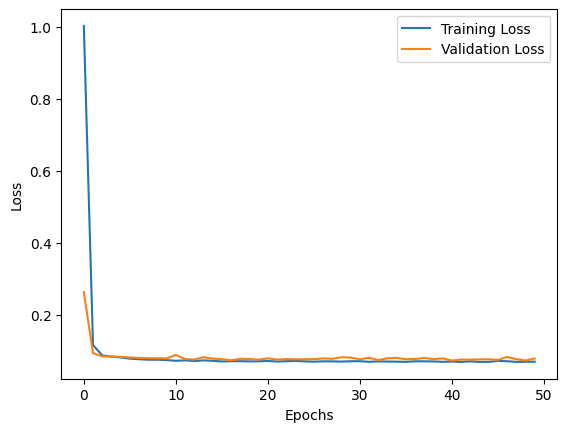

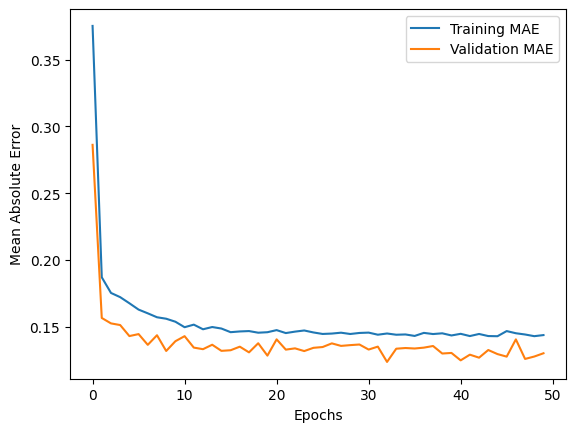

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()

In [ ]:
# Menyimpan model ke format .keras
model.save('model_trip.keras')

In [ ]:
import joblib

# Save the preprocessor
joblib.dump(preprocessor, 'preprocessor_trip.joblib')

# Save the TF-IDF vectorizer
joblib.dump(tfidf, 'tfidf_vectorizer_trip.joblib')

['tfidf_vectorizer_trip.joblib']

In [ ]:
#from keras.models import load_model

# Memuat model dari format .keras
#model = load_model('model_trip.keras')

In [ ]:
# Load the preprocessor
preprocessor = joblib.load('preprocessor_trip.joblib')
# Load the TF-IDF vectorizer
tfidf = joblib.load('tfidf_vectorizer_trip.joblib')

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

def recommend_trip_nn(trip_name, model=model, preprocessor=preprocessor, tfidf=tfidf):
    # Mendapatkan indeks trip yang sesuai
    idx = data[data['name'] == trip_name].index[0]

    # Mendapatkan fitur trip tanpa kolom target
    trip_features = data.iloc[idx].drop('name')

    # Memproses fitur menggunakan preprocessor
    trip_features_processed = preprocessor.transform(pd.DataFrame([trip_features.drop('mountain_name')]))

    # Memproses fitur teks menggunakan TF-IDF
    trip_tfidf = tfidf.transform([trip_features['mountain_name']])

    # Menggabungkan semua fitur yang telah diproses
    trip_input = np.hstack([trip_features_processed, trip_tfidf.toarray()])

    # Memprediksi menggunakan model neural network
    recommendations = model.predict(trip_input)

    # Menghitung cosine similarity antara prediksi dan semua fitur
    cosine_similarities = cosine_similarity(recommendations, features).flatten()

    # Mendapatkan indeks dari 10 nilai similarity tertinggi
    top_indices = cosine_similarities.argsort()[-10:][::-1]

    # Mengembalikan nama trip yang direkomendasikan
    return data.iloc[top_indices]['name'].values

# Contoh penggunaan
print(recommend_trip_nn('Edelweiss Adventure - Gunung Slamet via Bambangan (Paket Basecamp)'))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
['Eppala Adventure - Gunung Prau via Wates (Paket Full Trip)'
 'Eppala Adventure - Gunung Gede via Putri (Paket Mepo Jakarta Bogor)'
 'Eppala Adventure - Gunung Prau via Wates (Paket Full Trip)'
 'Eppala Adventure - Gunung Gede via Putri (Paket Mepo Jakarta Bogor)'
 'Eppala Adventure - Gunung Prau via Wates (Paket Full Trip)'
 'Eppala Adventure - Gunung Gede via Putri (Paket Mepo Jakarta Bogor)'
 'Eppala Adventure - Gunung Gede via Putri (Paket Mepo Basecamp)'
 'Eppala Adventure - Gunung Prau via Wates (Paket Mepo Basecamp)'
 'Eppala Adventure - Gunung Merbabu via Selo (Paket Full Trip)'
 'Eppala Adventure - Gunung Merbabu via Suwanting (Paket Full Trip)']


In [ ]:
['Eppala Adventure - Gunung Prau via Wates (Paket Full Trip)'
 'Eppala Adventure - Gunung Prau via Wates (Paket Full Trip)'
 'Eppala Adventure - Gunung Prau via Wates (Paket Mepo Basecamp)'
 'Eppala Adventure - Gunung Prau via Wates (Paket Full Trip)'
 'Eppala Adventure - Gunung Prau via Wates (Paket Mepo Basecamp)'
 'Eppala Adventure - Gunung Gede via Putri (Paket Mepo Jakarta Bogor)'
 'Eppala Adventure - Gunung Prau via Wates (Paket Full Trip)'
 'Eppala Adventure - Gunung Prau via Wates (Paket Mepo Basecamp)'
 'Eppala Adventure - Gunung Gede via Putri (Paket Mepo Jakarta Bogor)'
 'Eppala Adventure - Gunung Gede via Putri (Paket Mepo Basecamp)']

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

def recommend_trip_nn(trip_name, model=model, preprocessor=preprocessor, tfidf=tfidf):
    # Mendapatkan indeks trip yang sesuai
    idx = data[data['name'] == trip_name].index[0]

    # Mendapatkan fitur trip tanpa kolom target
    trip_features = data.iloc[idx].drop('name')

    # Memproses fitur menggunakan preprocessor
    trip_features_processed = preprocessor.transform(pd.DataFrame([trip_features.drop('mountain_name')]))

    # Memproses fitur teks menggunakan TF-IDF
    trip_tfidf = tfidf.transform([trip_features['mountain_name']])

    # Menggabungkan semua fitur yang telah diproses
    trip_input = np.hstack([trip_features_processed, trip_tfidf.toarray()])

    # Memprediksi menggunakan model neural network
    recommendations = model.predict(trip_input)

    # Menghitung cosine similarity antara prediksi dan semua fitur
    cosine_similarities = cosine_similarity(recommendations, features).flatten()

    # Mendapatkan indeks dari 10 nilai similarity tertinggi
    top_indices = cosine_similarities.argsort()[-10:][::-1]

    # Mengambil nama trip dan nilai cosine similarity
    recommended_trips = data.iloc[top_indices]['name'].values
    similarity_scores = cosine_similarities[top_indices]

    # Menggabungkan nama trip dengan nilai cosine similarity
    recommendations_with_scores = list(zip(recommended_trips, similarity_scores))

    return recommendations_with_scores

# Contoh penggunaan
recommended_trips = recommend_trip_nn('Edelweiss Adventure - Gunung Slamet via Bambangan (Paket Basecamp)')
for trip, score in recommended_trips:
    print(f"{trip}: {score:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Eppala Adventure - Gunung Slamet via Bambangan (Paket Full Trip): 0.9253
Eppala Adventure - Gunung Ciremai via Apuy (Paket Full Trip): 0.9251
Eppala Adventure - Gunung Slamet via Bambangan (Paket Full Trip): 0.9232
Eppala Adventure - Gunung Ciremai via Apuy (Paket Full Trip): 0.9230
Eppala Adventure - Gunung Gede via Putri (Paket Mepo Jakarta Bogor): 0.9182
Eppala Adventure - Gunung Prau via Wates (Paket Full Trip): 0.9168
Eppala Adventure - Gunung Gede via Putri (Paket Mepo Jakarta Bogor): 0.9165
Eppala Adventure - Gunung Merbabu via Selo (Paket Full Trip): 0.9157
Eppala Adventure - Gunung Slamet via Bambangan (Paket Full Trip): 0.9154
Eppala Adventure - Gunung Ciremai via Apuy (Paket Full Trip): 0.9152
